#### Imports

In [14]:
using Plots
using Random

# Motion Planning Using Convex Optimization

## Model

In [12]:
struct Point
    x::Float64
    y::Float64
end

In [13]:
struct Pose
    position::Point
    orientation::Float64
end

## Random Map Generation

### Random Convex Polygon Generation

In [173]:
function GenerateRandomConvexPolygon(numberOfVertices::Int64)
    # Still remains a test for convexity and 
    #keep up with the computation until a convex poligon is found
    
    xCoordinateRandomPoints = []
    yCoordinateRandomPoints = []

    for i in 1:numberOfVertices
        append!(xCoordinateRandomPoints, rand())
        append!(yCoordinateRandomPoints, rand())
    end

    sort!(xCoordinateRandomPoints)
    sort!(yCoordinateRandomPoints)

    minimumX = xCoordinateRandomPoints[1]
    maximumX = xCoordinateRandomPoints[numberOfVertices]
    minimumY = yCoordinateRandomPoints[1]
    maximumY = yCoordinateRandomPoints[numberOfVertices]


    xVectors = []
    yVectors = []

    lastTop = minimumX
    lastBot = minimumX;

    for i in 2:numberOfVertices-1
        x = xCoordinateRandomPoints[i];

        if rand(Bool)
            append!(xVectors, x - lastTop)
            lastTop = x;
        else 
            append!(xVectors, x - lastBot)
            lastBot = x;
        end
    end

    append!(xVectors, maximumX - lastTop)
    append!(xVectors, lastBot - maximumX)

    lastLeft = minimumY
    lastRight = minimumY;

    for i in 2:numberOfVertices-1
        y = yCoordinateRandomPoints[i];

        if rand(Bool)
            append!(yVectors, y - lastLeft)
            lastLeft = y;
        else 
            append!(yVectors, lastRight - y)
            lastRight = y;
        end
    end

    append!(yVectors, maximumY - lastLeft)
    append!(yVectors, lastRight - maximumY)

    shuffle(yVectors);

    points = []
    angles = []

    for i in 1:numberOfVertices
        push!(points, Point(xVectors[i],yVectors[i]))
        append!(angles, atan(yVectors[i],xVectors[i]))
    end

    order = sortperm(angles)
    

    points = points[order]

    x = 0.0
    y = 0.0
    minPolygonX = 0;
    minPolygonY = 0;
    newPoints = []
    for i in 1:numberOfVertices 
        push!(newPoints, Point(x,y))

        x += points[i].x;
        y += points[i].y;

        minPolygonX = min(minPolygonX, x)
        minPolygonY = min(minPolygonY, y)
    end
    

    xShift = minimumX - minPolygonX;
    yShift = minimumY - minPolygonY;

    for i in 1:numberOfVertices 
        p = points[i]
        points[i] = Point(p.x + xShift, p.y + yShift)
    end
    
    return points;
end


GenerateRandomConvexPolygon (generic function with 1 method)

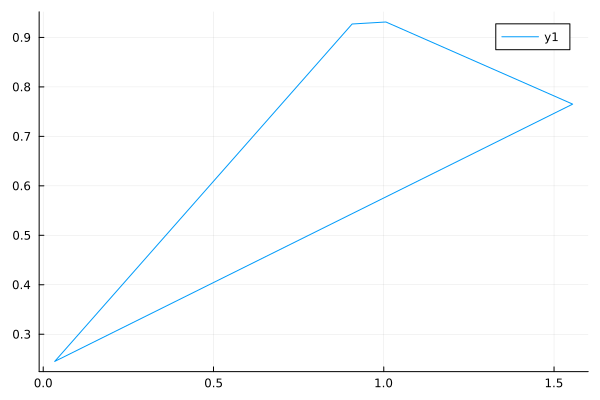

In [174]:
a = GenerateRandomConvexPolygon(4)
xs = []
ys = []
for i in 1:4
    append!(xs,a[i].x)
    append!(ys,a[i].y)
end

append!(xs,a[1].x)
append!(ys,a[1].y)

plot(xs,ys)

reference: https://cglab.ca/~sander/misc/ConvexGeneration/convex.html

In [79]:
point = Point(1,2)
point2 = Point(1,2)

Point(1.0, 2.0)

In [84]:
a = [point,point2]

push!(a, Point(1,2))

3-element Vector{Point}:
 Point(1.0, 2.0)
 Point(1.0, 2.0)
 Point(1.0, 2.0)

In [9]:
point.y

2.0

In [62]:
x = [1,2,3,4,5]
shuffle!(x)

5-element Vector{Int64}:
 3
 1
 5
 2
 4

In [64]:
minimum(x)

1

In [108]:
min(1,2)

1